# 全体のコード
Irisを分類するためのコードを実装します。

## ●ミニバッチ法の実装
今回はミニバッチ法を用いるので、バッチごとに重みとバイアスを更新します。  
以下はミニバッチ法による学習の実装です。  

In [ ]:
# -- 学習と経過の記録 --
n_batch = n_train // batch_size  # 1エポックあたりのバッチ数
for i in range(epoch):

    ・・・

    # -- 学習 -- 
    index_random = np.arange(n_train)
    np.random.shuffle(index_random)  # インデックスをシャッフルする
    for j in range(n_batch):
        
        # ミニバッチを取り出す
        mb_index = index_random[j*batch_size : (j+1)*batch_size]
        x = input_train[mb_index, :]
        t = correct_train[mb_index, :]
        
        # 順伝播と逆伝播
        forward_propagation(x)
        backpropagation(t)
        
        # 重みとバイアスの更新
        uppdate_wb()

コードではまず、`n_train`を`batch_size`で割ることで1エポックあたりのバッチ数を求めています。  
学習に使うバッチ数が整数なので、端数として学習に使われないデータも存在することになりますが、少数でありバッチはエポックごとにランダムに選択されるので、今回はこれを無視します。    

訓練データのサンプル数分だけインデックスを作成して`index_random`とし、これをシャッフルします。  
そして、ループの中でこれからバッチサイズ分だけランダムなインデックスを取り出し、`mb_index`とします。  
`input_train`と`correct_train`は行列ですが、これらからインデックスが`mb_index`の列を抜き出してミニバッチとします。  
このミニバッチを使用して順伝播と逆伝播の計算を行い、重みとバイアスを更新します。

## ●正解率の測定
学習の結果、訓練データのうち何％を正しく品種分類できるようになったのか、テストデータのうち何％を正しく品種分類できるようになったのかは学習の成否を判断するために重要です。  
これらに関しては、学習の終了後に以下のコードで測定できます。

In [ ]:
# -- 正解率の測定 -- 
forward_propagation(input_train)
count_train = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_train, axis=1))

forward_propagation(input_test)
count_test = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_test, axis=1))

print("Accuracy Train:", str(count_train/n_train*100) + "%",
      "Accuracy Test:", str(count_test/n_test*100) + "%")

コードでは、全訓練データとテストデータに対してそれぞれ順伝播の計算をした後、それぞれ正解数をカウントします。  
正解数のカウントにはNumpyのargmax関数を用いますが、argmaxは最大値のインデックスを返します。  

順伝播により得られた出力は(バッチサイズ)x(出力層のニューロン数)の行列になりますが、argmax関数で、各行のうち最大のもののインデックスを以下の箇所で取得します。

In [ ]:
np.argmax(output_layer.y, axis=1)

取得したインデックスは、例えば以下のような一次元配列行列になります。  

[1 0 2 ・・・（中略）・・・2]

また、正解も(バッチサイズ)x(出力層のニューロン数)の行列になりますが、各行がone-hot表現になっています。  
以下の箇所では、argmax関数で各行のうち最大のもの、すなわち値が1の要素のインデックスを取得します。

In [ ]:
np.argmax(correct_train, axis=1)

取得したインデックスは、例えば以下のような一次元配列になります。

[1 0 1 ・・・（中略）・・・2]

これら2つの行列の各要素が一致すれば、比較演算子`==`はTrueを返し、一致しなければFalseを返します。  
結果として、サンプルごとの正解と不正解がTrueとFalseで表される以下のような配列ができます。

[True True False ・・・（中略）・・・True]

Pythonでは、Trueを1、Falseを0とみなすことができるので、Numpyのsum関数にこの配列を入れることで正解数をカウントすることができます。  
コードでは、この正解数をサンプル数で割って100をかけることにより正解率としています。  

## ●ディープラーニングのコード
ディープラーニングのコード全体は以下の通りです。  
実行すると、ディープニューラルネットワークがIrisの特徴を学習します。

学習中、1エポックごとに訓練データの誤差（訓練誤差）とテストデータの誤差（テスト誤差）がそれぞれ測定、記録されます。  
学習終了後に、誤差の変動を表すグラフと正解率が表示されます。  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# --irisデータを読み込み--
iris_data = datasets.load_iris()
input_data = iris_data.data
correct = iris_data.target
n_data = len(correct)

correct_data = np.zeros((n_data, 3))
for i in range(n_data):
    correct_data[i, correct[i]] = 1.0
    
# --訓練データとテストデーターー
index = np.arange(n_data)
index_train = index[index %2 == 0]
index_test = index[index %2 !=0]

input_train = input_data[index_train, :]
correct_train = correct_data[index_train, :]
input_test = input_data[index_test, :]
correct_test = correct_data[index_test, :]

n_train = input_train.shape[0]
n_test = input_test.shape[0]

n_in = 4
n_mid = 25
n_out = 3

wb_width = 0.1
eta = 0.01
epoch = 100
batch_size = 8
interval = 20


In [ ]:


# -- 各層の継承元 --
class BaseLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
# -- 中間層 --        
class MiddleLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        self.u = np.dot(x, self.w) + self.b
        self.y = np.where(self.u <= 0, 0, self.u)  # ReLU
        
    def backward(self, grad_y):
        delta = grad_y * np.where(self.u <= 0, 0, 1)   # ReLUの微分
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
# -- 出力層 --
class OutputLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True)   # ソフトマックス関数
        
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
# -- 各層の初期化 --
middle_layer_1 = MiddleLayer(n_in, n_mid)
middle_layer_2 = MiddleLayer(n_mid, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 順伝播 --
def forward_propagation(x):
    middle_layer_1.forward(x)
    middle_layer_2.forward(middle_layer_1.y)
    output_layer.forward(middle_layer_2.y)
    
# -- 逆伝播 --
def back_propagation(t):
    output_layer.backward(t)
    middle_layer_2.backward(output_layer.grad_x)
    middle_layer_1.backward(middle_layer_2.grad_x)
    
# -- 重みとバイアスの更新 --
def update_wb():
    middle_layer_1.update(eta)
    middle_layer_2.update(eta)
    output_layer.update(eta)
    
# -- 誤差を計算 --
def get_error(t, batch_size):
    return -np.sum(t*np.log(output_layer.y + 1e-7)) / batch_size

# -- 誤差の記録用 --
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

# -- 学習と経過の記録 --
n_batch = n_train // batch_size
for i in range(epoch):
    
    # -- 誤差の計測 --  
    forward_propagation(input_train)
    error_train = get_error(correct_train, n_train)
    forward_propagation(input_test)
    error_test = get_error(correct_test, n_test)
    
    # -- 誤差の記録 -- 
    test_error_x.append(i)
    test_error_y.append(error_test)
    train_error_x.append(i)
    train_error_y.append(error_test)
    
    # -- 経過の表示 -- 
    if i%interval == 0:
        print('Epoch:' + str(i) + '/' + str(epoch),
             'Error_train:' + str(error_train),
             'Error_test:' + str(error_test))
        
    # -- 学習 -- 
    index_random = np.arange(n_train)
    np.random.shuffle(index_random)  # インデックスをシャッフルする
    for j in range(n_batch):

        # ミニバッチを取り出す        
        mb_index = index_random[j*batch_size: (j+1)*batch_size]
        x = input_train[mb_index, :]
        t = correct_train[mb_index, :]
        
        # 順伝播と逆伝播
        forward_propagation(x)
        back_propagation(t)
        
        # 重みとバイアスの更新
        update_wb()


# -- 誤差の記録をグラフ表示 -- 
plt.plot(train_error_x, train_error_y, label='Train')
plt.plot(test_error_x, test_error_y, label='Test')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Error')

plt.show()

# -- 正解率の測定 -- 
forward_propagation(input_train)
count_train = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_train, axis=1))

forward_propagation(input_test)
count_test = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_test, axis=1))

print('Accuray Train', str(count_train/n_train*100) + '%',
     'Accuray Test', str(count_test/n_test*100) + '%')

Epoch:0/100 Error_train:1.0909553524887512 Error_test:1.0930863963586053
Epoch:20/100 Error_train:0.22307247940635141 Error_test:0.22915971734136145
Epoch:40/100 Error_train:0.062086944111854066 Error_test:0.08698473565278761
Epoch:60/100 Error_train:0.034503054009953946 Error_test:0.07239124274900322
Epoch:80/100 Error_train:0.02313924231574293 Error_test:0.07584908489888802


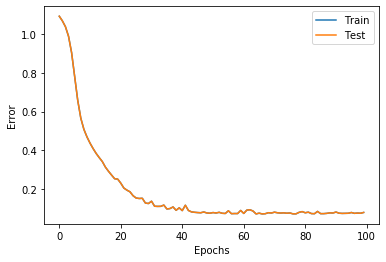

Accuray Train 100.0% Accuray Test 97.33333333333334%


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# -- Irisデータの読み込み --
iris_data = datasets.load_iris()
input_data = iris_data.data
correct = iris_data.target
n_data = len(correct)  # サンプル数

# -- 入力データを標準化する --
ave_input = np.average(input_data, axis=0)
std_input = np.std(input_data, axis=0)
input_data = (input_data - ave_input) / std_input

# -- 正解をone-hot表現にする --
correct_data = np.zeros((n_data, 3))
for i in range(n_data):
    correct_data[i, correct[i]] = 1.0
    
# -- 訓練データとテストデータ --
index = np.arange(n_data)
index_train = index[index %2 ==0]
index_test = index[index %2 !=0]

input_train = input_data[index_train, :] # 訓練 入力
correct_train = correct_data[index_train, :] # 訓練 正解
input_test = input_data[index_test, :] # テスト 入力
correct_test = correct_data[index_test, :] # テスト 正解

n_train = input_train.shape[0] # 訓練データのサンプル数
n_test = input_test.shape[0] # テストデータのサンプル数

# -- 各設定値 --
n_in = 4   # 入力層のニューロン数
n_mid = 25  # 中間層のニューロン数
n_out = 3  # 出力層のニューロン数

wb_width = 0.1  # 重みとバイアスの広がり具合
eta = 0.01  # 学習係数
epoch = 100
batch_size = 8
interval = 20  # 経過の表示間隔

# -- 各層の継承元 --
class BaseLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
# -- 中間層 --        
class MiddleLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        self.u = np.dot(x, self.w) + self.b
        self.y = np.where(self.u <= 0, 0, self.u)  # ReLU
        
    def backward(self, grad_y):
        delta = grad_y * np.where(self.u <= 0, 0, 1)   # ReLUの微分
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
# -- 出力層 --
class OutputLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True)   # ソフトマックス関数
        
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
# -- 各層の初期化 --
middle_layer_1 = MiddleLayer(n_in, n_mid)
middle_layer_2 = MiddleLayer(n_mid, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 順伝播 --
def forward_propagation(x):
    middle_layer_1.forward(x)
    middle_layer_2.forward(middle_layer_1.y)
    output_layer.forward(middle_layer_2.y)
    
# -- 逆伝播 --
def back_propagation(t):
    output_layer.backward(t)
    middle_layer_2.backward(output_layer.grad_x)
    middle_layer_1.backward(middle_layer_2.grad_x)
    
# -- 重みとバイアスの更新 --
def update_wb():
    middle_layer_1.update(eta)
    middle_layer_2.update(eta)
    output_layer.update(eta)
    
# -- 誤差を計算 --
def get_error(t, batch_size):
    return -np.sum(t*np.log(output_layer.y + 1e-7)) / batch_size

# -- 誤差の記録用 --
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

# -- 学習と経過の記録 --
n_batch = n_train // batch_size
for i in range(epoch):
    
    # -- 誤差の計測 --  
    forward_propagation(input_train)
    error_train = get_error(correct_train, n_train)
    forward_propagation(input_test)
    error_test = get_error(correct_test, n_test)
    
    # -- 誤差の記録 -- 
    test_error_x.append(i)
    test_error_y.append(error_test)
    train_error_x.append(i)
    train_error_y.append(error_test)
    
    # -- 経過の表示 -- 
    if i%interval == 0:
        print('Epoch:' + str(i) + '/' + str(epoch),
             'Error_train:' + str(error_train),
             'Error_test:' + str(error_test))
        
    # -- 学習 -- 
    index_random = np.arange(n_train)
    np.random.shuffle(index_random)  # インデックスをシャッフルする
    for j in range(n_batch):

        # ミニバッチを取り出す        
        mb_index = index_random[j*batch_size: (j+1)*batch_size]
        x = input_train[mb_index, :]
        t = correct_train[mb_index, :]
        
        # 順伝播と逆伝播
        forward_propagation(x)
        back_propagation(t)
        
        # 重みとバイアスの更新
        update_wb()


# -- 誤差の記録をグラフ表示 -- 
plt.plot(train_error_x, train_error_y, label='Train')
plt.plot(test_error_x, test_error_y, label='Test')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Error')

plt.show()

# -- 正解率の測定 -- 
forward_propagation(input_train)
count_train = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_train, axis=1))

forward_propagation(input_test)
count_test = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_test, axis=1))

print('Accuray Train', str(count_train/n_train*100) + '%',
     'Accuray Test', str(count_test/n_test*100) + '%')

Epoch:0/100 Error_train:1.1132465586687124 Error_test:1.113791694600511
Epoch:20/100 Error_train:0.24623934739136133 Error_test:0.2372316916457851
Epoch:40/100 Error_train:0.06568126331253882 Error_test:0.08976688038731719
Epoch:60/100 Error_train:0.036542035712012 Error_test:0.07795568601587945
Epoch:80/100 Error_train:0.024928088205736363 Error_test:0.07451105792760963


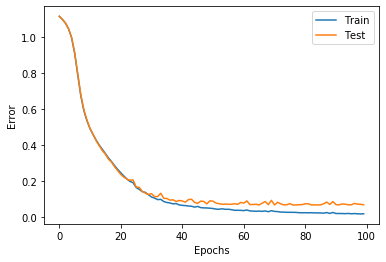

Accuracy Train: 100.0% Accuracy Test: 97.33333333333334%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# -- Irisデータの読み込み --
iris_data = datasets.load_iris()
input_data = iris_data.data
correct = iris_data.target
n_data = len(correct)  # サンプル数

# -- 入力データを標準化する --
ave_input = np.average(input_data, axis=0)
std_input = np.std(input_data, axis=0)
input_data = (input_data - ave_input) / std_input

# -- 正解をone-hot表現にする --
correct_data = np.zeros((n_data, 3))
for i in range(n_data):
    correct_data[i, correct[i]] = 1.0

# -- 訓練データとテストデータ --
index = np.arange(n_data)
index_train = index[index%2 == 0]
index_test = index[index%2 != 0]

input_train = input_data[index_train, :]  # 訓練 入力
correct_train = correct_data[index_train, :]  # 訓練 正解
input_test = input_data[index_test, :]  # テスト 入力
correct_test = correct_data[index_test, :]  # テスト 正解

n_train = input_train.shape[0]  # 訓練データのサンプル数
n_test = input_test.shape[0]  # テストデータのサンプル数

# -- 各設定値 --
n_in = 4  # 入力層のニューロン数
n_mid = 25  # 中間層のニューロン数
n_out = 3  # 出力層のニューロン数

wb_width = 0.1  # 重みとバイアスの広がり具合
eta = 0.01  # 学習係数
epoch = 100
batch_size = 8
interval = 20  # 経過の表示間隔


# -- 各層の継承元 --
class BaseLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)  # 重み（行列）
        self.b = wb_width * np.random.randn(n)  # バイアス（ベクトル）

    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

# -- 中間層 --
class MiddleLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        self.u = np.dot(x, self.w) + self.b
        self.y = np.where(self.u <= 0, 0, self.u) # ReLU
    
    def backward(self, grad_y):
        delta = grad_y * np.where(self.u <= 0, 0, 1)  # ReLUの微分

        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T) 

# -- 出力層 --
class OutputLayer(BaseLayer):     
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True)  # ソフトマックス関数

    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T) 
        

# -- 各層の初期化 --
middle_layer_1 = MiddleLayer(n_in, n_mid)
middle_layer_2 = MiddleLayer(n_mid, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 順伝播 --
def forward_propagation(x):
    middle_layer_1.forward(x)
    middle_layer_2.forward(middle_layer_1.y)
    output_layer.forward(middle_layer_2.y)

# -- 逆伝播 --
def backpropagation(t):
    output_layer.backward(t)
    middle_layer_2.backward(output_layer.grad_x)
    middle_layer_1.backward(middle_layer_2.grad_x)

# -- 重みとバイアスの更新 --
def uppdate_wb():
    middle_layer_1.update(eta)
    middle_layer_2.update(eta)
    output_layer.update(eta)

# -- 誤差を計算 --
def get_error(t, batch_size):
    return -np.sum(t * np.log(output_layer.y + 1e-7)) / batch_size  # 交差エントロピー誤差


# -- 誤差の記録用 --
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

# -- 学習と経過の記録 --
n_batch = n_train // batch_size  # 1エポックあたりのバッチ数
for i in range(epoch):

    # -- 誤差の計測 --  
    forward_propagation(input_train)
    error_train = get_error(correct_train, n_train)
    forward_propagation(input_test)
    error_test = get_error(correct_test, n_test)
    
    # -- 誤差の記録 -- 
    test_error_x.append(i)
    test_error_y.append(error_test) 
    train_error_x.append(i)
    train_error_y.append(error_train) 
    
    # -- 経過の表示 -- 
    if i%interval == 0:
        print("Epoch:" + str(i) + "/" + str(epoch),
              "Error_train:" + str(error_train),
              "Error_test:" + str(error_test))

    # -- 学習 -- 
    index_random = np.arange(n_train)
    np.random.shuffle(index_random)  # インデックスをシャッフルする
    for j in range(n_batch):
        
        # ミニバッチを取り出す
        mb_index = index_random[j*batch_size : (j+1)*batch_size]
        x = input_train[mb_index, :]
        t = correct_train[mb_index, :]
        
        # 順伝播と逆伝播
        forward_propagation(x)
        backpropagation(t)
        
        # 重みとバイアスの更新
        uppdate_wb()

        
# -- 誤差の記録をグラフ表示 -- 
plt.plot(train_error_x, train_error_y, label="Train")
plt.plot(test_error_x, test_error_y, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")

plt.show()

# -- 正解率の測定 -- 
forward_propagation(input_train)
count_train = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_train, axis=1))

forward_propagation(input_test)
count_test = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_test, axis=1))

print("Accuracy Train:", str(count_train/n_train*100) + "%",
      "Accuracy Test:", str(count_test/n_test*100) + "%")

epoch数を重ねると、訓練誤差、テスト誤差、共に揺らぎながらもきれいに減少して0に近づきます。  
また、訓練データだけではなくテストデータでも高い正解率が得られました。